# Kelompok 8
 - Atta A. Kurnia (2006836)
 - Azzahra Alika (2105899)
 - Azzam M. Naufal ()
 - Muhamad N. Daffa (2003217)
 - Riska Nurohmah (2109103)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset atau file csv ke DataFrame
df2 = pd.read_csv("C:\\Users\\riska\\Downloads\\data_returns\\orders_train.txt", sep=";")

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           481092 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


In [4]:
df2.head(3)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1


Terdapat datatype yang seharusnya merupakan datetime namun bertipe object, sehingga perlu diubah.

In [5]:
df2.isna().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

In [6]:
df2.isin(['?']).sum()

orderItemID           0
orderDate             0
deliveryDate      39419
itemID                0
size                  0
color               143
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48889
state                 0
creationDate          0
returnShipment        0
dtype: int64

# praproses orderDate & deliveryDate

In [7]:
#melihat banyak data deliveryDate yang tahunnya 1990
df2['deliveryDate'].str.contains("1990").sum()

4660

In [8]:
#melihat banyak data dateOfBirth yang tahunnya 1655
df2['dateOfBirth'].str.contains("1655").sum()

3

Terdapat data yang tidak valid pada attribut beberapa attribut berupa '?' dan datetime dengan nilai tahun yang tidak masuk akal seperti '1990' dan '1655'

In [9]:
#mengubah entry invalid menjadi NaN
df2 = df2.replace('?', np.nan)
df2 = df2.replace('1990-12-31', np.nan)
df2 = df2.replace('1655-04-19', np.nan)

In [10]:
#mengubah tipe data attribut yang berupa tanggal menjadi datetime
df2['orderDate'] = pd.to_datetime(df2['orderDate'])
df2['deliveryDate'] = pd.to_datetime(df2['deliveryDate'])
df2['dateOfBirth'] = pd.to_datetime(df2['dateOfBirth'])
df2['creationDate'] = pd.to_datetime(df2['creationDate'])

In [11]:
#membuat attribut baru dari orderDate dan deliveryDate agar dapat direpresentasikan sebagai numerik
df2.insert(2, "orderYear", np.nan)
df2.insert(3, "orderMonth", np.nan)
df2.insert(4, "orderDated", np.nan)
df2.insert(6, "deliveryYear", np.nan)
df2.insert(7, "deliveryMonth", np.nan)
df2.insert(8, "deliveryDated", np.nan)
#membuat attribut baru baru berupa durasi delivery (dalam hari)
df2.insert(9, "deliveryDuration", np.nan)

In [12]:
#proses mengisi tanggal order yang sudah dipisah
from datetime import timedelta
df2["orderYear"] = df2["orderDate"].dt.year
df2["orderMonth"] = df2["orderDate"].dt.month
df2["orderDated"] = df2["orderDate"].dt.day
#proses mengisi deliveryDuration untuk baris yang deliveryDate dan orderDatenya bukan NaN
df2.loc[(df2["deliveryDate"].notna()), "deliveryDuration"] = (df2["deliveryDate"]- df2["orderDate"]) / np.timedelta64(1, 'D')
#proses mengisi deliveryDuration yang NaN dengan median yang tidak NaN
median_duration = df2["deliveryDuration"].median()
df2.loc[(df2["deliveryDate"].isna()), "deliveryDuration"] = median_duration

df2.loc[(df2["deliveryDate"].isna()), "deliveryDate"] = df2["orderDate"].loc[(df2["deliveryDate"].isna())] + timedelta(days=median_duration)
#proses mengisi tanggal delivery yang sudah dipisah
df2["deliveryYear"] = df2["deliveryDate"].dt.year
df2["deliveryMonth"] = df2["deliveryDate"].dt.month
df2["deliveryDated"] = df2["deliveryDate"].dt.day

In [13]:
df2["orderYear"] = df2["orderYear"].astype('float')
df2["orderMonth"] = df2["orderMonth"].astype('float')
df2["orderDated"] = df2["orderDated"].astype('float')

df2["deliveryYear"] = df2["deliveryYear"].astype('float')
df2["deliveryMonth"] = df2["deliveryMonth"].astype('float')
df2["deliveryDated"] = df2["deliveryDated"].astype('float')

df2["deliveryDuration"] = df2["deliveryDuration"].astype('float')

<AxesSubplot:xlabel='deliveryDuration', ylabel='Count'>

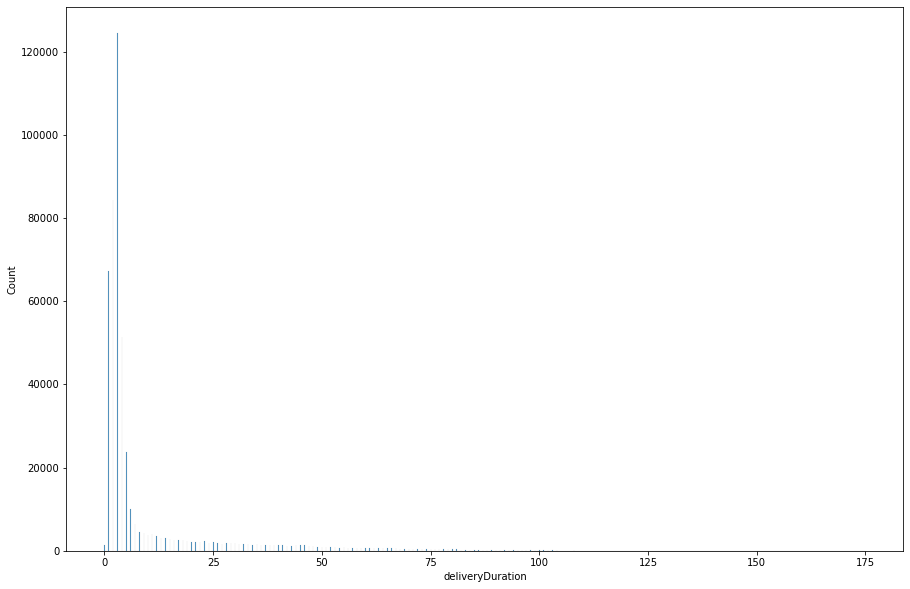

In [14]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data=df2, x='deliveryDuration')

<AxesSubplot:xlabel='deliveryDuration'>

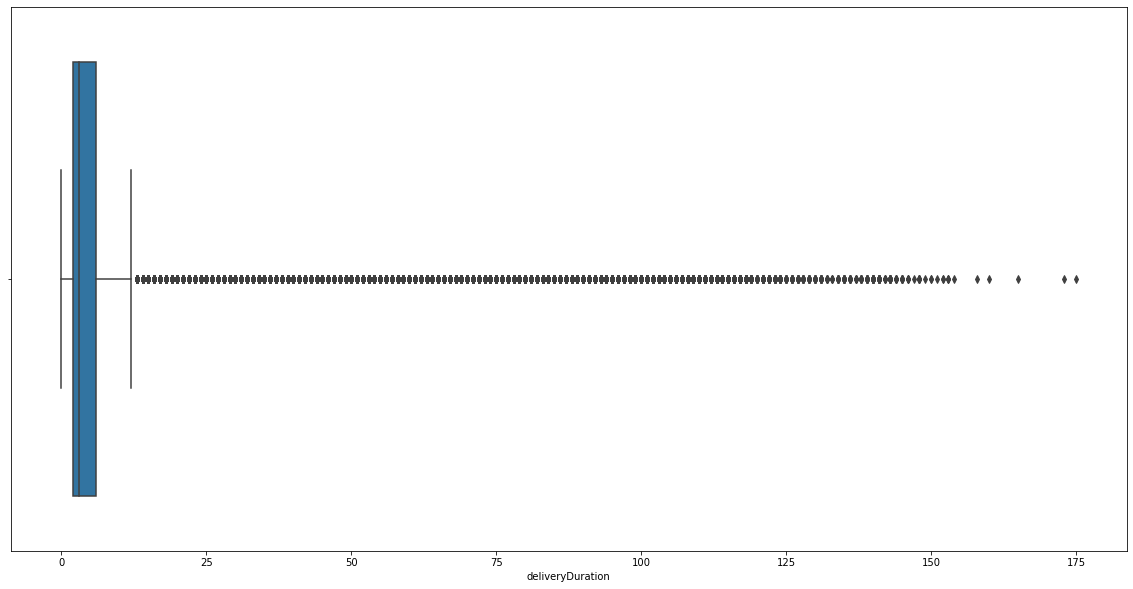

In [15]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(ax=ax, x="deliveryDuration", data=df2)

<AxesSubplot:xlabel='orderMonth', ylabel='count'>

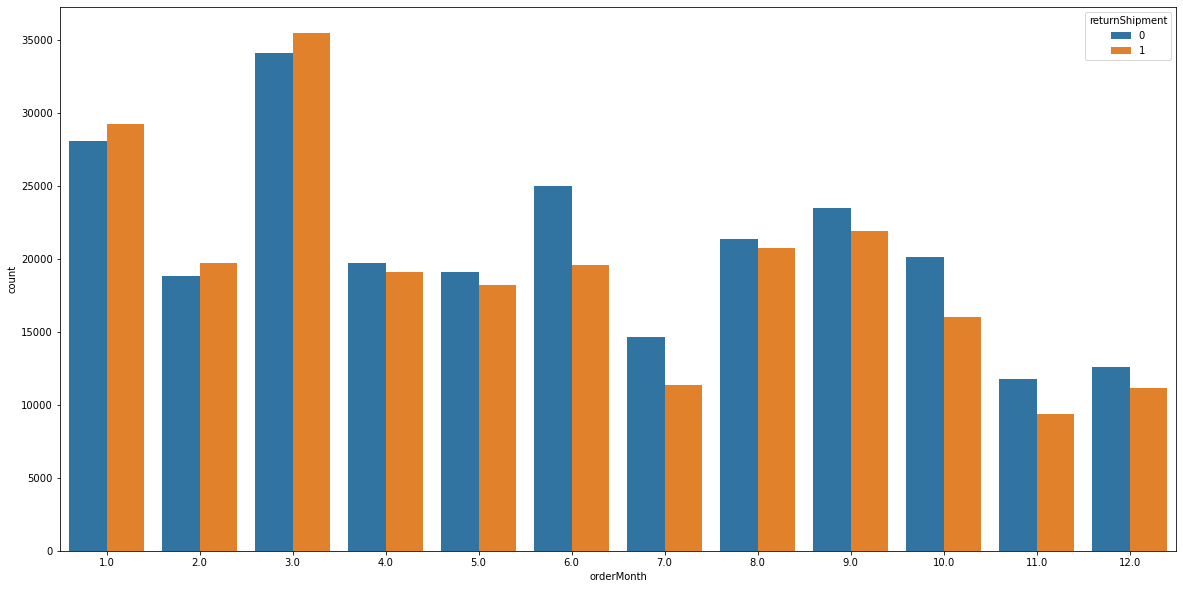

In [16]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x=df2['orderMonth'], hue='returnShipment', data=df2)

Dalam grafik orderDate per-bulan diatas terdapat frekuensi order yang tinggi di bulan 1 (Januari) dan bulan 3 (Maret). Tingginya frekuins pada bulan 1 dapat menandakan bahwa setelah tahun baru terdapat peningkatan order yang drastis. Lalu ada peningkatan lagi di bulan 3 yang merupakan awal dari musim semi.

<AxesSubplot:xlabel='orderDate', ylabel='count'>

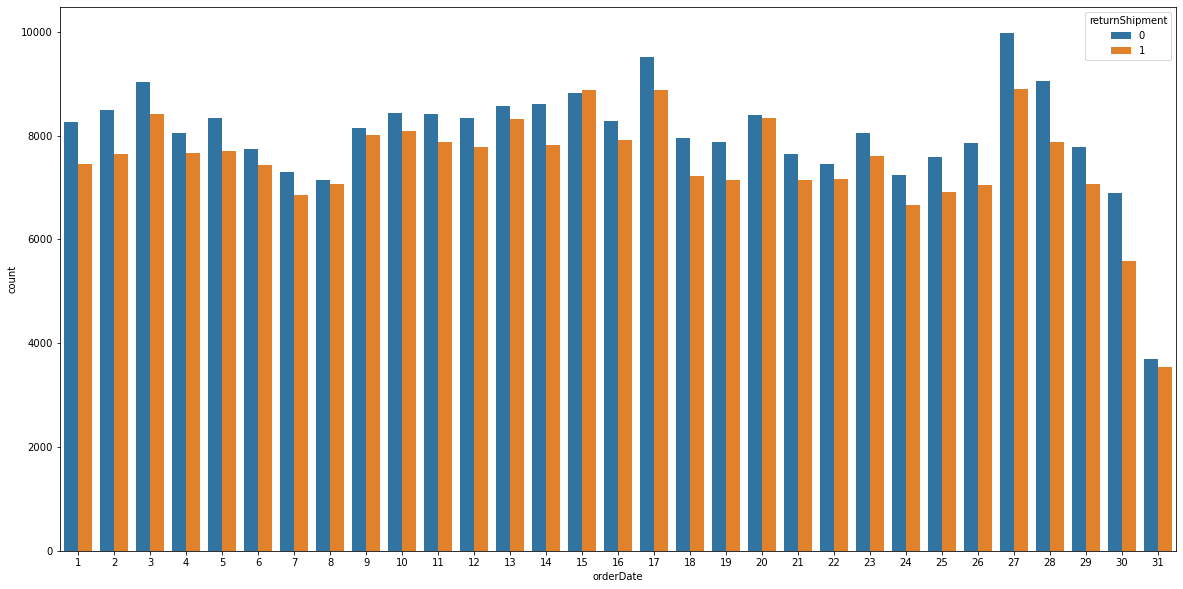

In [17]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x=df2['orderDate'].dt.day, hue='returnShipment', data=df2)

Dalam grafik orderDate per-hari diatas terdapat penurunan jumlah order yang signifikan dari tanggal 28 hingga tanggal 31. Hal ini dapat disebabkan oleh jumlah tanggal pada bulan Februari yang hanya sampai 28 dan tidak semua bulan memiliki 31 hari.

Terdapat satu instance dimana jumlah pengembalian lebih banyak dari yang tidak mengembalikan di tanggal 15.

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   orderItemID       481092 non-null  int64         
 1   orderDate         481092 non-null  datetime64[ns]
 2   orderYear         481092 non-null  float64       
 3   orderMonth        481092 non-null  float64       
 4   orderDated        481092 non-null  float64       
 5   deliveryDate      481092 non-null  datetime64[ns]
 6   deliveryYear      481092 non-null  float64       
 7   deliveryMonth     481092 non-null  float64       
 8   deliveryDated     481092 non-null  float64       
 9   deliveryDuration  481092 non-null  float64       
 10  itemID            481092 non-null  int64         
 11  size              481092 non-null  object        
 12  color             480949 non-null  object        
 13  manufacturerID    481092 non-null  int64         
 14  pric

# praproses size

In [19]:
#mengganti data size yang hurufnya kecil menjadi huruf kapital agar seragam
df2.loc[(df2["size"] == "s"), "size"] = "S"
df2.loc[(df2["size"] == "m"), "size"] = "M"
df2.loc[(df2["size"] == "l"), "size"] = "L"
df2.loc[(df2["size"] == "xl"), "size"] = "XL"
df2.loc[(df2["size"] == "xs"), "size"] = "XS"
df2.loc[(df2["size"] == "xxl"), "size"] = "XXL"
df2.loc[(df2["size"] == "xxxl"), "size"] = "XXXL"

In [20]:
#mengganti data size yang belakangnya terdapat tanda '+' dengan huruf untuk mengurangi variasi data
df2.loc[(df2["size"] == "9+"), "size"] = "M"
df2.loc[(df2["size"] == "10+"), "size"] = "L"
df2.loc[(df2["size"] == "8+"), "size"] = "M"
df2.loc[(df2["size"] == "42+"), "size"] = "L"
df2.loc[(df2["size"] == "4+"), "size"] = "XS"
df2.loc[(df2["size"] == "6+"), "size"] = "S"
df2.loc[(df2["size"] == "7+"), "size"] = "S"
df2.loc[(df2["size"] == "36+"), "size"] = "XS"
df2.loc[(df2["size"] == "39+"), "size"] = "S"
df2.loc[(df2["size"] == "40+"), "size"] = "M"
df2.loc[(df2["size"] == "5+"), "size"] = "XS"
df2.loc[(df2["size"] == "38+"), "size"] = "S"
df2.loc[(df2["size"] == "11+"), "size"] = "L"
df2.loc[(df2["size"] == "37+"), "size"] = "XS"
df2.loc[(df2["size"] == "41+"), "size"] = "M"
df2.loc[(df2["size"] == "3+"), "size"] = "XXS"
df2.loc[(df2["size"] == "44+"), "size"] = "XL"
df2.loc[(df2["size"] == "43+"), "size"] = "L"
df2.loc[(df2["size"] == "13+"), "size"] = "XL"
df2.loc[(df2["size"] == "45+"), "size"] = "XL"
df2.loc[(df2["size"] == "46+"), "size"] = "XXL"
df2.loc[(df2["size"] == "2+"), "size"] = "XXS"
df2.loc[(df2["size"] == "12+"), "size"] = "XL"

In [21]:
#mengganti huruf menjadi angka pada atribut size untuk mengubah tipe datanya
df2.loc[(df2["size"] == "S"), "size"] = "38"
df2.loc[(df2["size"] == "M"), "size"] = "40"
df2.loc[(df2["size"] == "L"), "size"] = "42"
df2.loc[(df2["size"] == "XL"), "size"] = "44"
df2.loc[(df2["size"] == "XS"), "size"] = "36"
df2.loc[(df2["size"] == "XXS"), "size"] = "34"
df2.loc[(df2["size"] == "XXL"), "size"] = "46"
df2.loc[(df2["size"] == "XXXL"), "size"] = "48"
df2.loc[(df2["size"] == "unsized"), "size"] = "0"

In [22]:
#mengganti tipe data size menjadi integer
df2["size"] = df2["size"].astype("int64")
#membuat kolom baru bertipe object untuk menampung data hasil perubahan dari atribut size
df2.insert(5,"realsize", "-")

In [23]:
#mengganti angka menjadi huruf berdasarkan ukuran baju US
df2.loc[(df2["size"] >= 1) & (df2["size"] <= 3), "realsize"] = "XXS"
df2.loc[(df2["size"] >= 4) & (df2["size"] <= 5), "realsize"] = "XS"
df2.loc[(df2["size"] >= 6) & (df2["size"] <= 7), "realsize"] = "S"
df2.loc[(df2["size"] >= 8) & (df2["size"] <= 9), "realsize"] = "M"
df2.loc[(df2["size"] >= 10) & (df2["size"] <= 11), "realsize"] = "L"
df2.loc[(df2["size"] >= 12) & (df2["size"] <= 13), "realsize"] = "XL"
df2.loc[(df2["size"] >= 14) & (df2["size"] <= 15), "realsize"] = "XXL"
df2.loc[(df2["size"] >= 16) & (df2["size"] <= 17), "realsize"] = "XXXL"

In [24]:
#mengganti angka menjadi huruf berdasarkan ukuran baju Eropa
df2.loc[(df2["size"] >= 18) & (df2["size"] <= 35), "realsize"] = "XXS"
df2.loc[(df2["size"] >= 36) & (df2["size"] <= 37), "realsize"] = "XS"
df2.loc[(df2["size"] >= 38) & (df2["size"] <= 39), "realsize"] = "S"
df2.loc[(df2["size"] >= 40) & (df2["size"] <= 41), "realsize"] = "M"
df2.loc[(df2["size"] >= 42) & (df2["size"] <= 43), "realsize"] = "L"
df2.loc[(df2["size"] >= 44) & (df2["size"] <= 45), "realsize"] = "XL"
df2.loc[(df2["size"] >= 46) & (df2["size"] <= 47), "realsize"] = "XXL"
df2.loc[(df2["size"] >= 48), "realsize"] = "XXXL"

In [25]:
#mengubah data pada size yang 0 menjadi unsized
df2.loc[(df2["size"] == 0), "realsize"] = "unsized"

In [26]:
#menghapus kolom size
df2 = df2.drop(['size'],axis=1)

In [27]:
#mengganti nama kolom realsize menjadi size
df2.rename(columns = {'realsize':'size'}, inplace = True)

In [28]:
df2["size"].value_counts(dropna = False)

M          116780
L           96052
S           84923
XL          69884
XXL         52434
unsized     26039
XS          19190
XXS          8514
XXXL         7276
Name: size, dtype: int64

In [29]:
df2.isna().sum()

orderItemID             0
orderDate               0
orderYear               0
orderMonth              0
orderDated              0
size                    0
deliveryDate            0
deliveryYear            0
deliveryMonth           0
deliveryDated           0
deliveryDuration        0
itemID                  0
color                 143
manufacturerID          0
price                   0
customerID              0
salutation              0
dateOfBirth         48892
state                   0
creationDate            0
returnShipment          0
dtype: int64

# praproses color

In [30]:
#Proses Smoothing warna menjadi hanya warna primer, sekunder, dan netral
df2["color"] = df2["color"].replace('basalt', 'black')
df2["color"] = df2["color"].replace('ebony', 'black')
df2["color"] = df2["color"].replace('aqua', 'blue')
df2["color"] = df2["color"].replace('azure', 'blue')
df2["color"] = df2["color"].replace('blau', 'blue')
df2["color"] = df2["color"].replace('baltic blue', 'blue')
df2["color"] = df2["color"].replace('cobalt blue', 'blue')
df2["color"] = df2["color"].replace('dark denim', 'blue')
df2["color"] = df2["color"].replace('dark navy', 'blue')
df2["color"] = df2["color"].replace('darkblue', 'blue')
df2["color"] = df2["color"].replace('denim', 'blue')
df2["color"] = df2["color"].replace('navy', 'blue')
df2["color"] = df2["color"].replace('petrol', 'blue')
df2["color"] = df2["color"].replace('almond', 'brown')
df2["color"] = df2["color"].replace('bronze', 'brown')
df2["color"] = df2["color"].replace('brwon', 'brown')
df2["color"] = df2["color"].replace('caramel', 'brown')
df2["color"] = df2["color"].replace('cognac', 'brown')
df2["color"] = df2["color"].replace('copper coin', 'brown')
df2["color"] = df2["color"].replace('cortina mocca', 'brown')
df2["color"] = df2["color"].replace('khaki', 'brown')
df2["color"] = df2["color"].replace('mahagoni', 'brown')
df2["color"] = df2["color"].replace('mocca', 'brown')
df2["color"] = df2["color"].replace('ocher', 'brown')
df2["color"] = df2["color"].replace('terracotta', 'brown')
df2["color"] = df2["color"].replace('aquamarine', 'green')
df2["color"] = df2["color"].replace('avocado', 'green')
df2["color"] = df2["color"].replace('dark oliv', 'green')
df2["color"] = df2["color"].replace('jade', 'green')
df2["color"] = df2["color"].replace('mint', 'green')
df2["color"] = df2["color"].replace('oliv', 'green')
df2["color"] = df2["color"].replace('olive', 'green')
df2["color"] = df2["color"].replace('turquoise', 'green')
df2["color"] = df2["color"].replace('anthracite', 'grey')
df2["color"] = df2["color"].replace('ash', 'grey')
df2["color"] = df2["color"].replace('dark grey', 'grey')
df2["color"] = df2["color"].replace('graphite', 'grey')
df2["color"] = df2["color"].replace('iron', 'grey')
df2["color"] = df2["color"].replace('apricot', 'orange')
df2["color"] = df2["color"].replace('coral', 'orange')
df2["color"] = df2["color"].replace('mango', 'orange')
df2["color"] = df2["color"].replace('antique pink', 'pink')
df2["color"] = df2["color"].replace('fuchsia', 'pink')
df2["color"] = df2["color"].replace('magenta', 'pink')
df2["color"] = df2["color"].replace('amethyst', 'purple')
df2["color"] = df2["color"].replace('aubergine', 'purple')
df2["color"] = df2["color"].replace('berry', 'purple')
df2["color"] = df2["color"].replace('currant purple', 'purple')
df2["color"] = df2["color"].replace('hibiscus', 'purple')
df2["color"] = df2["color"].replace('bordeaux', 'red')
df2["color"] = df2["color"].replace('crimson', 'red')
df2["color"] = df2["color"].replace('dark garnet', 'red')
df2["color"] = df2["color"].replace('beige', 'white')
df2["color"] = df2["color"].replace('champagner', 'white')
df2["color"] = df2["color"].replace('ecru', 'white')
df2["color"] = df2["color"].replace('ivory', 'white')
df2["color"] = df2["color"].replace('silver', 'white')
df2["color"] = df2["color"].replace('vanille', 'white')
df2["color"] = df2["color"].replace('creme', 'yellow')
df2["color"] = df2["color"].replace('curry', 'yellow')
df2["color"] = df2["color"].replace('gold', 'yellow')
df2["color"] = df2["color"].replace('ingwer', 'yellow')
df2["color"] = df2["color"].replace('lemon', 'yellow')
#Proses smoothing untuk warna yang merupakan sebuah pola dan atau memiliki lebih dari 1 warna dasar
df2["color"] = df2["color"].replace('leopard', 'other')
df2["color"] = df2["color"].replace('perlmutt', 'other')
df2["color"] = df2["color"].replace('curled', 'other')
df2["color"] = df2["color"].replace('aviator', 'other')
df2["color"] = df2["color"].replace('opal', 'other')
df2["color"] = df2["color"].replace('kanel', 'other')
df2["color"] = df2["color"].replace('striped', 'other')
df2["color"] = df2["color"].replace('floral', 'other')
df2["color"] = df2["color"].replace('stained', 'other')
df2["color"] = df2["color"].replace('ancient', 'other')
df2["color"] = df2["color"].replace('pallid', 'other')
df2["color"] = df2["color"].replace('nature', 'other')
df2["color"] = df2["color"].replace('habana', 'other')

In [31]:
#Proses mengisi entry yang NaN menjadi "unspecified"
df2.loc[(df2["color"].isna()), "color"] = "unspecified"

In [32]:
df2.isna().sum()

orderItemID             0
orderDate               0
orderYear               0
orderMonth              0
orderDated              0
size                    0
deliveryDate            0
deliveryYear            0
deliveryMonth           0
deliveryDated           0
deliveryDuration        0
itemID                  0
color                   0
manufacturerID          0
price                   0
customerID              0
salutation              0
dateOfBirth         48892
state                   0
creationDate            0
returnShipment          0
dtype: int64

In [33]:
df2['salutation'].value_counts(dropna=False)

Mrs             461769
Mr               16720
Family            1891
Company            361
not reported       351
Name: salutation, dtype: int64

# praproses salutation

<AxesSubplot:xlabel='salutation', ylabel='count'>

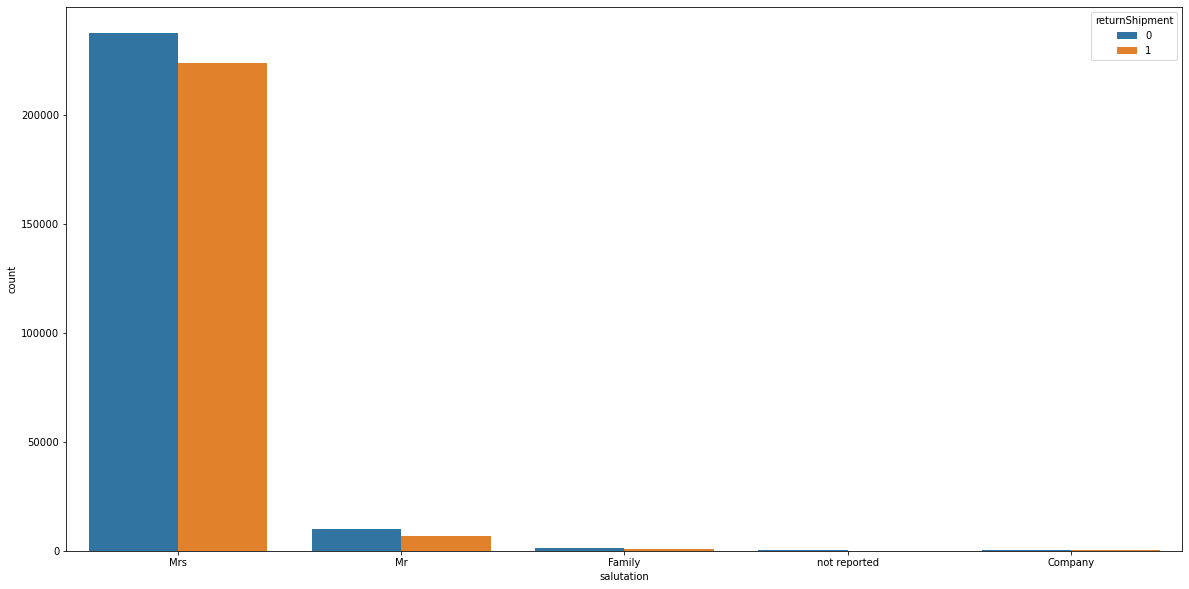

In [34]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x="salutation", hue='returnShipment', data=df2)

Terdapat kesenjangan jumlah data di attribut salutation, jumlah entry 'Mrs' membuat entry lainnya terlihat hampir tidak ada

<AxesSubplot:xlabel='salutation', ylabel='count'>

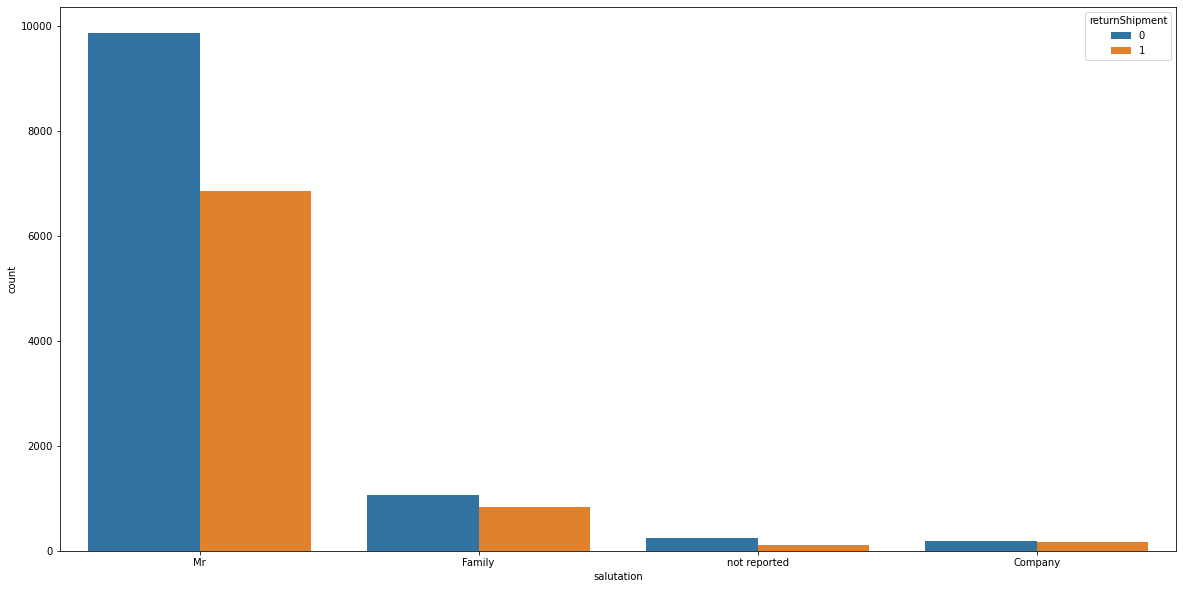

In [35]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x=df2["salutation"].loc[(df2["salutation"] != "Mrs")], hue='returnShipment', data=df2)

Jika dibandingkan dengan salutation 'Mr', 'family', 'not reported', dan 'Company' masih terlihat sangat sedikit. Entry yang bukan 'Mr' dan 'Mrs' dikelompokkan menjadi 'Other' karna jumlahnya yang sedikit dan agar lebih terfokus ke gendered 'salutation'.

In [36]:
df2['salutation'] = df2['salutation'].replace('Family', 'Other')
df2['salutation'] = df2['salutation'].replace('Company', 'Other')
df2['salutation'] = df2['salutation'].replace('not reported', 'Other')

# praproses dateOfBirth

In [37]:
df2.insert(19, "customerAge", np.nan)

In [38]:
df2["customerAge"] = df2["deliveryYear"].max() - df2["dateOfBirth"].dt.year

<AxesSubplot:xlabel='customerAge', ylabel='Count'>

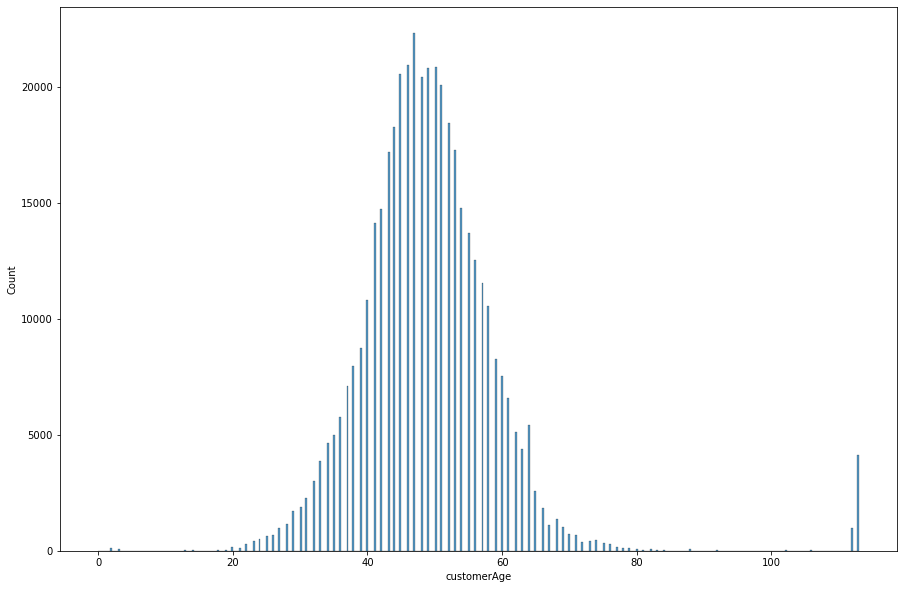

In [39]:
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(ax=ax, data=df2, x='customerAge')

<AxesSubplot:xlabel='customerAge'>

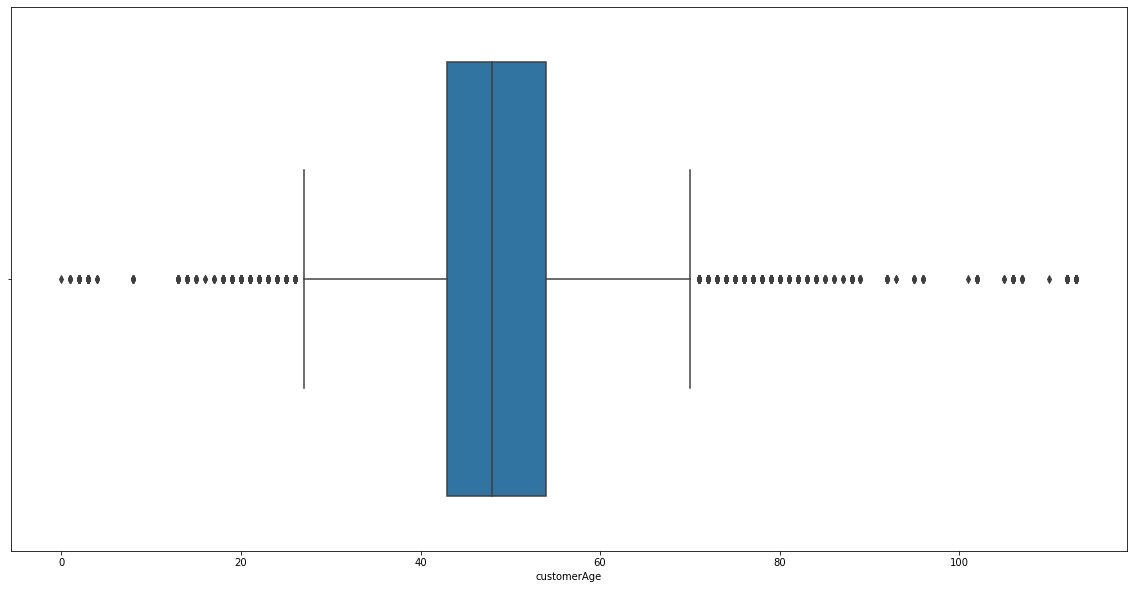

In [40]:
fig, ax = plt.subplots(figsize = (20,10))
sns.boxplot(ax=ax, x="customerAge", data=df2)

In [41]:
df2["customerAge"].describe()

count    432200.000000
mean         49.218061
std          11.065563
min           0.000000
25%          43.000000
50%          48.000000
75%          54.000000
max         113.000000
Name: customerAge, dtype: float64

In [42]:
df2["customerAge"].isna().sum()

48892

### Mengisi data customerAge yang kosong menggunakan median

In [43]:
df2.loc[(df2["customerAge"].isna()), "customerAge"] = df2["customerAge"].median()

## deteksi outlier

IQR = 53 - 44 

Batas atas = 53 + 1.5(11) 


Batas bawah = 44 - 1.5(11)

Batas atas = 69.5

Batas bawah = 27.5

In [44]:
upper_bound = 69
lower_bound = 27

<AxesSubplot:xlabel='customerAge', ylabel='count'>

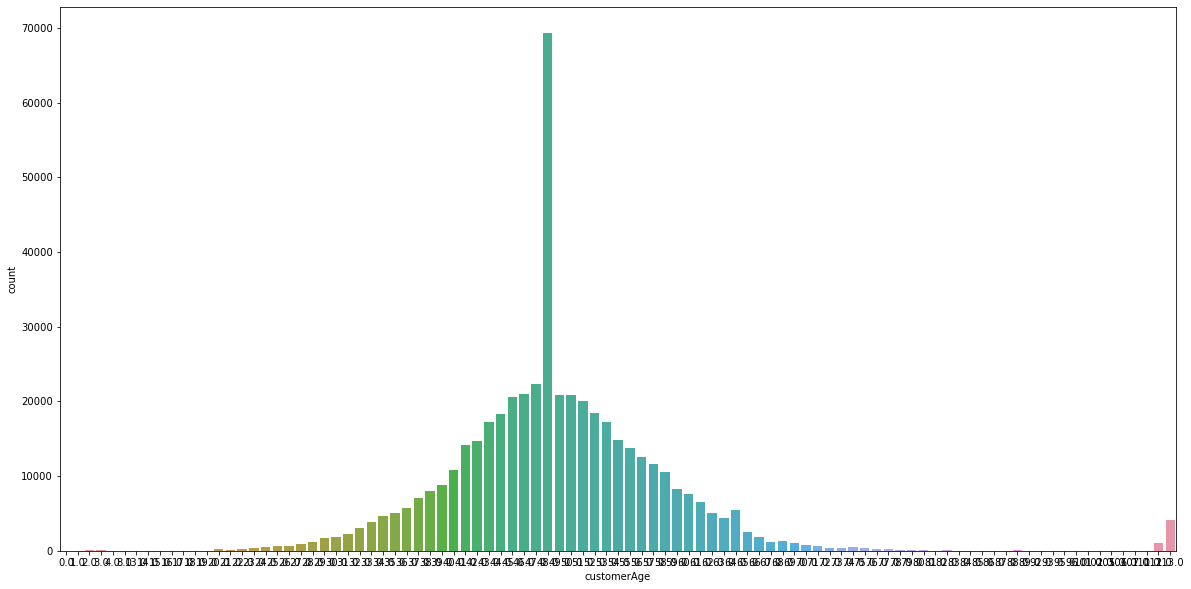

In [45]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x="customerAge", data=df2)

Berdasarkan countplot diatas terdapat outlier yang tampak alamiah dan outlier yang tidak alamiah seperti pada data umur 0 dan umur 112. Untuk menangani outlier tidak alamiah, yang berada di bawah batas umur penggunaan akun google (13 tahun) akan diubah menjadi nilai lower_bound, dan yang berada di atas angka harapan hidup negara Jerman di tahun 2013 (80 tahun) akan diubah menjadi nilai upper_bound.

In [46]:
#proses penanganan outlier diatas 80 tahun
df2.loc[((df2.customerAge > 80)), "customerAge"] = upper_bound

#proses penanganan outlier dibawah 13 tahun
df2.loc[((df2.customerAge < 13)), "customerAge"] = lower_bound

# praproses creationDate

In [47]:
df2.insert(21, "accountAgeMonth", np.nan)

In [48]:
df2["accountAgeMonth"] = ((df2["deliveryDate"].max() - df2["creationDate"]) / np.timedelta64(1, 'M')).round()

<AxesSubplot:xlabel='accountAgeMonth', ylabel='count'>

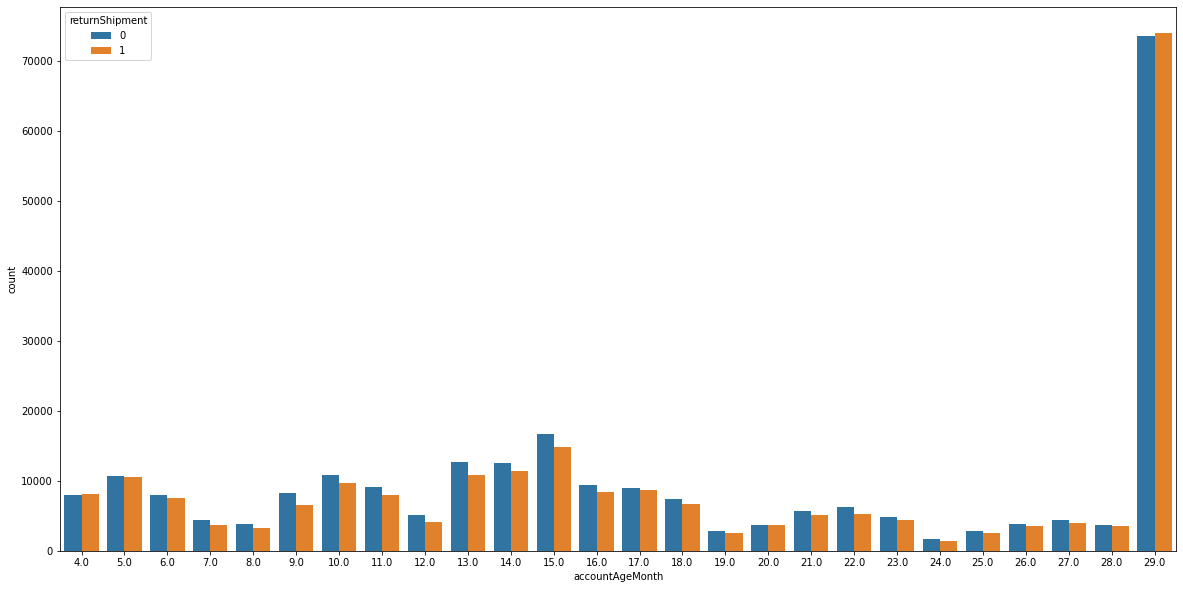

In [49]:
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(ax=ax, x="accountAgeMonth", hue="returnShipment", data=df2)

In [50]:
df2["accountAgeMonth"].value_counts(dropna=False)

29.0    147592
15.0     31495
14.0     24027
13.0     23476
5.0      21216
10.0     20454
16.0     17873
17.0     17603
11.0     17026
4.0      15991
6.0      15443
9.0      14909
18.0     14065
22.0     11532
21.0     10823
12.0      9229
23.0      9150
27.0      8475
7.0       8022
20.0      7383
26.0      7319
28.0      7167
8.0       7075
19.0      5336
25.0      5273
24.0      3138
Name: accountAgeMonth, dtype: int64

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   orderItemID       481092 non-null  int64         
 1   orderDate         481092 non-null  datetime64[ns]
 2   orderYear         481092 non-null  float64       
 3   orderMonth        481092 non-null  float64       
 4   orderDated        481092 non-null  float64       
 5   size              481092 non-null  object        
 6   deliveryDate      481092 non-null  datetime64[ns]
 7   deliveryYear      481092 non-null  float64       
 8   deliveryMonth     481092 non-null  float64       
 9   deliveryDated     481092 non-null  float64       
 10  deliveryDuration  481092 non-null  float64       
 11  itemID            481092 non-null  int64         
 12  color             481092 non-null  object        
 13  manufacturerID    481092 non-null  int64         
 14  pric

In [52]:
#proses drop orderDate, deliveryDate, dateOfBirth, dan creationDate karna sudah direpresentasikan dengan attribut-attribut khusus yang sudah dibuat
df2 = df2.drop(['orderDate', 'deliveryDate', 'dateOfBirth', 'creationDate'],axis=1)

In [53]:
df2.head(10)

,orderItemID,orderYear,orderMonth,orderDated,size,deliveryYear,deliveryMonth,deliveryDated,deliveryDuration,itemID,color,manufacturerID,price,customerID,salutation,state,customerAge,accountAgeMonth,returnShipment
0,1,2012.0,4.0,1.0,M,2012.0,4.0,3.0,2.0,186,blue,25,69.90,794,Mrs,Baden-Wuerttemberg,48.0,27.0,0
1,2,2012.0,4.0,1.0,M,2012.0,4.0,3.0,2.0,71,brown,21,69.95,794,Mrs,Baden-Wuerttemberg,48.0,27.0,1
2,3,2012.0,4.0,1.0,M,2012.0,4.0,3.0,2.0,71,yellow,21,69.95,794,Mrs,Baden-Wuerttemberg,48.0,27.0,1
3,4,2012.0,4.0,2.0,M,2012.0,4.0,5.0,3.0,22,green,14,39.90,808,Mrs,Saxony,54.0,19.0,0
4,5,2012.0,4.0,2.0,S,2012.0,4.0,5.0,3.0,151,black,53,29.90,825,Mrs,Rhineland-Palatinate,49.0,29.0,0
5,6,2012.0,4.0,2.0,XXL,2012.0,4.0,5.0,3.0,598,brown,87,89.90,825,Mrs,Rhineland-Palatinate,49.0,29.0,0
6,7,2012.0,4.0,2.0,S,2012.0,4.0,5.0,3.0,15,black,1,129.90,825,Mrs,Rhineland-Palatinate,49.0,29.0,0
7,8,2012.0,4.0,2.0,XXL,2012.0,4.0,3.0,1.0,32,brown,3,21.90,850,Mrs,North Rhine-Westphalia,65.0,29.0,1
8,9,2012.0,4.0,2.0,XXL,2012.0,4.0,3.0,1.0,32,red,3,21.90,850,Mrs,North Rhine-Westphalia,65.0,29.0,1
9,10,2012.0,4.0,2.0,XXL,2012.0,4.0,3.0,1.0,57,green,3,39.90,850,Mrs,North Rhine-Westphalia,65.0,29.0,1


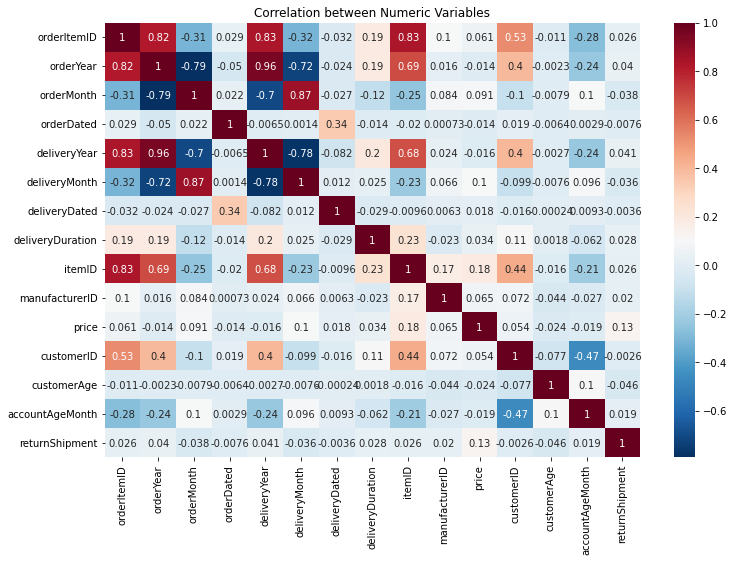

In [54]:
#melihat korelasi atribut returnShipment dengan atribut lainnya yang bertipe numerik
corr_pearson = df2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

In [55]:
df2["salutation"] = df2["salutation"].astype('category')
df2["state"] = df2["state"].astype('category')
df2["color"] = df2["color"].astype('category')
df2["size"] = df2["size"].astype('category')

In [56]:
#untuk mengubah atribut kategorikal menjadi one hot method
df2 = pd.get_dummies(data=df2, columns=['salutation','size','color','state'])

In [57]:
#untuk melihat jumlah kolom setelah di one hot
df2.shape

(481092, 56)

In [58]:
x = df2.drop("returnShipment", axis=1)
y = df2.returnShipment

In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   orderItemID                          481092 non-null  int64  
 1   orderYear                            481092 non-null  float64
 2   orderMonth                           481092 non-null  float64
 3   orderDated                           481092 non-null  float64
 4   deliveryYear                         481092 non-null  float64
 5   deliveryMonth                        481092 non-null  float64
 6   deliveryDated                        481092 non-null  float64
 7   deliveryDuration                     481092 non-null  float64
 8   itemID                               481092 non-null  int64  
 9   manufacturerID                       481092 non-null  int64  
 10  price                                481092 non-null  float64
 11  customerID   

# Membuat Model Klasifikasi

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=123)

In [61]:
import pickle
with open('C:\\Users\\riska\\Downloads\\data_returns\\orders_train_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

## Model Gausisan Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf_NB = GaussianNB()
clf_NB.fit(X_train, Y_train)
Y_pred = clf_NB.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.5549319780916451
              precision    recall  f1-score   support

           0       0.55      0.70      0.62     49723
           1       0.56      0.40      0.46     46496

    accuracy                           0.55     96219
   macro avg       0.55      0.55      0.54     96219
weighted avg       0.55      0.55      0.54     96219



## Model Decision Tree

In [63]:
from sklearn import tree
clf_DT = tree.DecisionTreeClassifier()
clf_DT.fit(X_train, Y_train)
Y_pred = clf_DT.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.5924817343767863
              precision    recall  f1-score   support

           0       0.61      0.60      0.60     49723
           1       0.58      0.58      0.58     46496

    accuracy                           0.59     96219
   macro avg       0.59      0.59      0.59     96219
weighted avg       0.59      0.59      0.59     96219



## Model Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf_RF3 = RandomForestClassifier(n_estimators=50, random_state=123)
clf_RF3.fit(X_train, Y_train)
Y_pred = clf_RF3.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6455897483864933
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     49723
           1       0.64      0.63      0.63     46496

    accuracy                           0.65     96219
   macro avg       0.65      0.64      0.65     96219
weighted avg       0.65      0.65      0.65     96219



Pembuatan model prediksi dengan menggunakan algoritma Random Forest memiliki hasil yang lebih baik daripada algoritma Naive Bayes dan Decision Tree. Selanjutnya dilakukan tuning pada parameter Random Forest atau menambah nilai estimatornya untuk mendapatkan hasil yang lebih tinggi.

In [65]:
from sklearn.ensemble import RandomForestClassifier
clf_RF2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf_RF2.fit(X_train, Y_train)
Y_pred = clf_RF2.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6529999272492959
              precision    recall  f1-score   support

           0       0.67      0.66      0.66     49723
           1       0.64      0.65      0.64     46496

    accuracy                           0.65     96219
   macro avg       0.65      0.65      0.65     96219
weighted avg       0.65      0.65      0.65     96219



Ketika nilai estimatornya dinaikan menjadi 100 terdapat kenaikan pada nilai akurasi dan f1-score 1 dari 0.63 menjadi 0.64.

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=200, random_state=123)
clf_RF.fit(X_train, Y_train)
Y_pred = clf_RF.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6560242779492615
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     49723
           1       0.64      0.66      0.65     46496

    accuracy                           0.66     96219
   macro avg       0.66      0.66      0.66     96219
weighted avg       0.66      0.66      0.66     96219



Ketika nilai estimatornya ditambah menjadi 200 terdapat kenaikan pada nilai akurasi dan f1-score 1 dari 0.64 menjadi 0.65. Hasil dari algoritma Random Forest dengan estimator 200 ini memiliki hasil yang paling tinggi, sehingga model ini yang akan digunakan untuk melakukan prediksi.

In [67]:
feature_importances = pd.DataFrame(clf_RF.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                     importance
orderItemID                            0.108274
customerID                             0.091538
itemID                                 0.081366
price                                  0.076461
customerAge                            0.072127
orderDated                             0.061332
deliveryDated                          0.059763
manufacturerID                         0.057429
deliveryDuration                       0.057111
accountAgeMonth                        0.046619
deliveryMonth                          0.021575
orderMonth                             0.018589
state_North Rhine-Westphalia           0.013321
size_L                                 0.011872
size_M                                 0.011605
state_Bavaria                          0.011111
state_Lower Saxony                     0.011081
state_Baden-Wuerttemberg               0.010664
color_blue                             0.010467
color_black                            0

## Cross-Validation DecisionTree

In [68]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def classification_report_with_accuracy_score(y_true, y_pred):    
    print(classification_report(y_true, y_pred)) 
    print(confusion_matrix(y_true, y_pred))
    return accuracy_score(y_true, y_pred) 
clf_CV = tree.DecisionTreeClassifier()
scores = cross_val_score(clf_CV, X=x, y=y, cv=4, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.52      1.00      0.68     62251
           1       0.16      0.00      0.00     58022

    accuracy                           0.52    120273
   macro avg       0.34      0.50      0.34    120273
weighted avg       0.35      0.52      0.35    120273

[[62093   158]
 [57991    31]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.55     62250
           1       0.47      0.40      0.43     58023

    accuracy                           0.50    120273
   macro avg       0.49      0.49      0.49    120273
weighted avg       0.49      0.50      0.49    120273

[[36620 25630]
 [34928 23095]]
              precision    recall  f1-score   support

           0       0.42      0.32      0.36     62250
           1       0.42      0.54      0.47     58023

    accuracy                           0.42    120273
   macro avg       0.42      0.43      0.42    120273
weighted avg

## Model XGBoost

import xgboost as xgb
clf_XGB = xgb.XGBClassifier(objective = "multi:softprob", num_class = 2, eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.1, n_estimators = 100, nthread=-1)
# num_class adalah jumlah kelas
clf_XGB.fit(X_train, Y_train)
Y_pred = clf_XGB.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

### Menyimpan model hasil training algoritma RandomForest

In [69]:
import joblib
import pandas as pd
joblib.dump(clf_RF, 'C:\\Users\\riska\\Downloads\\data_returns\\RF_order.joblib')

['C:\\Users\\riska\\Downloads\\data_returns\\RF_order.joblib']

# Implementasi Model

In [70]:
df_class = pd.read_csv("C:\\Users\\riska\\Downloads\\data_returns\\orders_class.txt", sep=";")

In [71]:
df_class.head(5)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
4,5,2013-04-01,?,2690,43,grey,1,119.9,12489,Mrs,1963-04-26,Hesse,2012-04-23


## Praproses

In [72]:
df_class.isna().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
dtype: int64

In [73]:
df_class.isin(['?']).sum()

orderItemID          0
orderDate            0
deliveryDate      4268
itemID               0
size                 0
color                0
manufacturerID       0
price                0
customerID           0
salutation           0
dateOfBirth       5169
state                0
creationDate         0
dtype: int64

In [74]:
#melihat banyak data deliveryDate yang tahunnya 1990
df_class['deliveryDate'].str.contains("1990").sum()

540

In [75]:
#melihat banyak data dateOfBirth yang tahunnya 1655
df_class['dateOfBirth'].str.contains("1655").sum()

0

In [76]:
df_class = df_class.replace('?', np.nan)
df_class = df_class.replace('1990-12-31', np.nan)
df_class = df_class.replace('1655-04-19', np.nan)

In [77]:
df_class['orderDate'] = pd.to_datetime(df_class['orderDate'])
df_class['deliveryDate'] = pd.to_datetime(df_class['deliveryDate'])
df_class['dateOfBirth'] = pd.to_datetime(df_class['dateOfBirth'])
df_class['creationDate'] = pd.to_datetime(df_class['creationDate'])

In [78]:
df_class.insert(2, "orderYear", np.nan)
df_class.insert(3, "orderMonth", np.nan)
df_class.insert(4, "orderDated", np.nan)

df_class.insert(6, "deliveryYear", np.nan)
df_class.insert(7, "deliveryMonth", np.nan)
df_class.insert(8, "deliveryDated", np.nan)

df_class.insert(9, "deliveryDuration", np.nan)

In [79]:
from datetime import timedelta
df_class["orderYear"] = df_class["orderDate"].dt.year
df_class["orderMonth"] = df_class["orderDate"].dt.month
df_class["orderDated"] = df_class["orderDate"].dt.day

df_class.loc[(df_class["deliveryDate"].notna()), "deliveryDuration"] = (df_class["deliveryDate"]- df_class["orderDate"]) / np.timedelta64(1, 'D')

median_duration = df_class["deliveryDuration"].median()
df_class.loc[(df_class["deliveryDate"].isna()), "deliveryDuration"] = median_duration

df_class.loc[(df_class["deliveryDate"].isna()), "deliveryDate"] = df_class["orderDate"].loc[(df_class["deliveryDate"].isna())] + timedelta(days=median_duration)

df_class["deliveryYear"] = df_class["deliveryDate"].dt.year
df_class["deliveryMonth"] = df_class["deliveryDate"].dt.month
df_class["deliveryDated"] = df_class["deliveryDate"].dt.day

In [80]:
df_class["orderYear"] = df_class["orderYear"].astype('float')
df_class["orderMonth"] = df_class["orderMonth"].astype('float')
df_class["orderDated"] = df_class["orderDated"].astype('float')

df_class["deliveryYear"] = df_class["deliveryYear"].astype('float')
df_class["deliveryMonth"] = df_class["deliveryMonth"].astype('float')
df_class["deliveryDated"] = df_class["deliveryDated"].astype('float')

df_class["deliveryDuration"] = df_class["deliveryDuration"].astype('float')

In [81]:
#mengganti data size yang hurufnya kecil menjadi huruf kapital agar seragam
df_class.loc[(df_class["size"] == "s"), "size"] = "S"
df_class.loc[(df_class["size"] == "m"), "size"] = "M"
df_class.loc[(df_class["size"] == "l"), "size"] = "L"
df_class.loc[(df_class["size"] == "xl"), "size"] = "XL"
df_class.loc[(df_class["size"] == "xs"), "size"] = "XS"
df_class.loc[(df_class["size"] == "xxl"), "size"] = "XXL"
df_class.loc[(df_class["size"] == "xxxl"), "size"] = "XXXL"

In [82]:
#mengganti data size yang belakangnya terdapat tanda '+' dengan huruf untuk mengurangi variasi data
df_class.loc[(df_class["size"] == "9+"), "size"] = "M"
df_class.loc[(df_class["size"] == "10+"), "size"] = "L"
df_class.loc[(df_class["size"] == "8+"), "size"] = "M"
df_class.loc[(df_class["size"] == "42+"), "size"] = "L"
df_class.loc[(df_class["size"] == "4+"), "size"] = "XS"
df_class.loc[(df_class["size"] == "6+"), "size"] = "S"
df_class.loc[(df_class["size"] == "7+"), "size"] = "S"
df_class.loc[(df_class["size"] == "36+"), "size"] = "XS"
df_class.loc[(df_class["size"] == "39+"), "size"] = "S"
df_class.loc[(df_class["size"] == "40+"), "size"] = "M"
df_class.loc[(df_class["size"] == "5+"), "size"] = "XS"
df_class.loc[(df_class["size"] == "38+"), "size"] = "S"
df_class.loc[(df_class["size"] == "11+"), "size"] = "L"
df_class.loc[(df_class["size"] == "37+"), "size"] = "XS"
df_class.loc[(df_class["size"] == "41+"), "size"] = "M"
df_class.loc[(df_class["size"] == "3+"), "size"] = "XXS"
df_class.loc[(df_class["size"] == "44+"), "size"] = "XL"
df_class.loc[(df_class["size"] == "43+"), "size"] = "L"
df_class.loc[(df_class["size"] == "13+"), "size"] = "XL"
df_class.loc[(df_class["size"] == "45+"), "size"] = "XL"
df_class.loc[(df_class["size"] == "46+"), "size"] = "XXL"
df_class.loc[(df_class["size"] == "2+"), "size"] = "XXS"
df_class.loc[(df_class["size"] == "12+"), "size"] = "XL"

In [83]:
#mengganti huruf menjadi angka pada atribut size untuk mengubah tipe datanya
df_class.loc[(df_class["size"] == "S"), "size"] = "38"
df_class.loc[(df_class["size"] == "M"), "size"] = "40"
df_class.loc[(df_class["size"] == "L"), "size"] = "42"
df_class.loc[(df_class["size"] == "XL"), "size"] = "44"
df_class.loc[(df_class["size"] == "XS"), "size"] = "36"
df_class.loc[(df_class["size"] == "XXS"), "size"] = "34"
df_class.loc[(df_class["size"] == "XXL"), "size"] = "46"
df_class.loc[(df_class["size"] == "XXXL"), "size"] = "48"
df_class.loc[(df_class["size"] == "unsized"), "size"] = "0"

In [84]:
#mengganti tipe data size menjadi integer
df_class["size"] = df_class["size"].astype("int64")
#membuat kolom baru bertipe object untuk menampung data hasil perubahan dari atribut size
df_class.insert(5,"realsize", "-")

In [85]:
#mengganti angka menjadi huruf berdasarkan ukuran baju US
df_class.loc[(df_class["size"] >= 1) & (df_class["size"] <= 3), "realsize"] = "XXS"
df_class.loc[(df_class["size"] >= 4) & (df_class["size"] <= 5), "realsize"] = "XS"
df_class.loc[(df_class["size"] >= 6) & (df_class["size"] <= 7), "realsize"] = "S"
df_class.loc[(df_class["size"] >= 8) & (df_class["size"] <= 9), "realsize"] = "M"
df_class.loc[(df_class["size"] >= 10) & (df_class["size"] <= 11), "realsize"] = "L"
df_class.loc[(df_class["size"] >= 12) & (df_class["size"] <= 13), "realsize"] = "XL"
df_class.loc[(df_class["size"] >= 14) & (df_class["size"] <= 15), "realsize"] = "XXL"
df_class.loc[(df_class["size"] >= 16) & (df_class["size"] <= 17), "realsize"] = "XXXL"

In [86]:
#mengganti angka menjadi huruf berdasarkan ukuran baju Eropa
df_class.loc[(df_class["size"] >= 18) & (df_class["size"] <= 35), "realsize"] = "XXS"
df_class.loc[(df_class["size"] >= 36) & (df_class["size"] <= 37), "realsize"] = "XS"
df_class.loc[(df_class["size"] >= 38) & (df_class["size"] <= 39), "realsize"] = "S"
df_class.loc[(df_class["size"] >= 40) & (df_class["size"] <= 41), "realsize"] = "M"
df_class.loc[(df_class["size"] >= 42) & (df_class["size"] <= 43), "realsize"] = "L"
df_class.loc[(df_class["size"] >= 44) & (df_class["size"] <= 45), "realsize"] = "XL"
df_class.loc[(df_class["size"] >= 46) & (df_class["size"] <= 47), "realsize"] = "XXL"
df_class.loc[(df_class["size"] >= 48), "realsize"] = "XXXL"

In [87]:
#mengubah data pada size yang 0 menjadi unsized
df_class.loc[(df_class["size"] == 0), "realsize"] = "unsized"
#menghapus kolom size
df_class = df_class.drop(['size'],axis=1)
#mengganti nama kolom realsize menjadi size
df_class.rename(columns = {'realsize':'size'}, inplace = True)

In [88]:
df_class["color"] = df_class["color"].replace('basalt', 'black')
df_class["color"] = df_class["color"].replace('ebony', 'black')
df_class["color"] = df_class["color"].replace('aqua', 'blue')
df_class["color"] = df_class["color"].replace('azure', 'blue')
df_class["color"] = df_class["color"].replace('blau', 'blue')
df_class["color"] = df_class["color"].replace('baltic blue', 'blue')
df_class["color"] = df_class["color"].replace('cobalt blue', 'blue')
df_class["color"] = df_class["color"].replace('dark denim', 'blue')
df_class["color"] = df_class["color"].replace('dark navy', 'blue')
df_class["color"] = df_class["color"].replace('darkblue', 'blue')
df_class["color"] = df_class["color"].replace('denim', 'blue')
df_class["color"] = df_class["color"].replace('navy', 'blue')
df_class["color"] = df_class["color"].replace('petrol', 'blue')
df_class["color"] = df_class["color"].replace('almond', 'brown')
df_class["color"] = df_class["color"].replace('bronze', 'brown')
df_class["color"] = df_class["color"].replace('brwon', 'brown')
df_class["color"] = df_class["color"].replace('caramel', 'brown')
df_class["color"] = df_class["color"].replace('cognac', 'brown')
df_class["color"] = df_class["color"].replace('copper coin', 'brown')
df_class["color"] = df_class["color"].replace('cortina mocca', 'brown')
df_class["color"] = df_class["color"].replace('khaki', 'brown')
df_class["color"] = df_class["color"].replace('mahagoni', 'brown')
df_class["color"] = df_class["color"].replace('mocca', 'brown')
df_class["color"] = df_class["color"].replace('ocher', 'brown')
df_class["color"] = df_class["color"].replace('terracotta', 'brown')
df_class["color"] = df_class["color"].replace('aquamarine', 'green')
df_class["color"] = df_class["color"].replace('avocado', 'green')
df_class["color"] = df_class["color"].replace('dark oliv', 'green')
df_class["color"] = df_class["color"].replace('jade', 'green')
df_class["color"] = df_class["color"].replace('mint', 'green')
df_class["color"] = df_class["color"].replace('oliv', 'green')
df_class["color"] = df_class["color"].replace('olive', 'green')
df_class["color"] = df_class["color"].replace('turquoise', 'green')
df_class["color"] = df_class["color"].replace('anthracite', 'grey')
df_class["color"] = df_class["color"].replace('ash', 'grey')
df_class["color"] = df_class["color"].replace('dark grey', 'grey')
df_class["color"] = df_class["color"].replace('graphite', 'grey')
df_class["color"] = df_class["color"].replace('iron', 'grey')
df_class["color"] = df_class["color"].replace('apricot', 'orange')
df_class["color"] = df_class["color"].replace('coral', 'orange')
df_class["color"] = df_class["color"].replace('mango', 'orange')
df_class["color"] = df_class["color"].replace('antique pink', 'pink')
df_class["color"] = df_class["color"].replace('fuchsia', 'pink')
df_class["color"] = df_class["color"].replace('magenta', 'pink')
df_class["color"] = df_class["color"].replace('amethyst', 'purple')
df_class["color"] = df_class["color"].replace('aubergine', 'purple')
df_class["color"] = df_class["color"].replace('berry', 'purple')
df_class["color"] = df_class["color"].replace('currant purple', 'purple')
df_class["color"] = df_class["color"].replace('hibiscus', 'purple')
df_class["color"] = df_class["color"].replace('bordeaux', 'red')
df_class["color"] = df_class["color"].replace('crimson', 'red')
df_class["color"] = df_class["color"].replace('dark garnet', 'red')
df_class["color"] = df_class["color"].replace('beige', 'white')
df_class["color"] = df_class["color"].replace('champagner', 'white')
df_class["color"] = df_class["color"].replace('ecru', 'white')
df_class["color"] = df_class["color"].replace('ivory', 'white')
df_class["color"] = df_class["color"].replace('silver', 'white')
df_class["color"] = df_class["color"].replace('vanille', 'white')
df_class["color"] = df_class["color"].replace('creme', 'yellow')
df_class["color"] = df_class["color"].replace('curry', 'yellow')
df_class["color"] = df_class["color"].replace('gold', 'yellow')
df_class["color"] = df_class["color"].replace('ingwer', 'yellow')
df_class["color"] = df_class["color"].replace('lemon', 'yellow')
#Pattern || Multicolor
df_class["color"] = df_class["color"].replace('leopard', 'other')
df_class["color"] = df_class["color"].replace('perlmutt', 'other')
df_class["color"] = df_class["color"].replace('curled', 'other')
df_class["color"] = df_class["color"].replace('aviator', 'other')
df_class["color"] = df_class["color"].replace('opal', 'other')
df_class["color"] = df_class["color"].replace('kanel', 'other')
df_class["color"] = df_class["color"].replace('striped', 'other')
df_class["color"] = df_class["color"].replace('floral', 'other')
df_class["color"] = df_class["color"].replace('stained', 'other')
df_class["color"] = df_class["color"].replace('ancient', 'other')
df_class["color"] = df_class["color"].replace('pallid', 'other')
df_class["color"] = df_class["color"].replace('nature', 'other')
df_class["color"] = df_class["color"].replace('habana', 'other')
#NaN value
df_class.loc[(df_class["color"].isna()), "color"] = "unspecified"

In [89]:
df_class['salutation'] = df_class['salutation'].replace('Family', 'Other')
df_class['salutation'] = df_class['salutation'].replace('Company', 'Other')
df_class['salutation'] = df_class['salutation'].replace('not reported', 'Other')

In [90]:
df_class.insert(19, "customerAge", np.nan)
df_class["customerAge"] = df_class["deliveryDate"].dt.year.max() - df_class["dateOfBirth"].dt.year

In [91]:
df_class.loc[(df_class["customerAge"].isna()), "customerAge"] = df_class["customerAge"].median()

In [92]:
upper_bound = 69
lower_bound = 27
#proses penanganan outlier diatas 80 tahun
df_class.loc[((df_class.customerAge > 80)), "customerAge"] = upper_bound

#proses penanganan outlier dibawah 13 tahun
df_class.loc[((df_class.customerAge < 13)), "customerAge"] = lower_bound

In [93]:
df_class.insert(21, "accountAgeMonth", np.nan)
df_class["accountAgeMonth"] = ((df_class["deliveryDate"].max() - df_class["creationDate"]) / np.timedelta64(1, 'M')).round()

In [94]:
df_class = df_class.drop(['orderDate', 'deliveryDate', 'dateOfBirth', 'creationDate'],axis=1)

In [95]:
df_class["salutation"] = df_class["salutation"].astype('category')
df_class["state"] = df_class["state"].astype('category')
df_class["color"] = df_class["color"].astype('category')
df_class["size"] = df_class["size"].astype('category')

#untuk mengubah atribut menjadi one hot method
df_class2 = pd.get_dummies(data=df_class, columns=['salutation','size','color','state'])

In [96]:
df_class2.shape

(50078, 54)

In [97]:
df_class2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   orderItemID                          50078 non-null  int64  
 1   orderYear                            50078 non-null  float64
 2   orderMonth                           50078 non-null  float64
 3   orderDated                           50078 non-null  float64
 4   deliveryYear                         50078 non-null  float64
 5   deliveryMonth                        50078 non-null  float64
 6   deliveryDated                        50078 non-null  float64
 7   deliveryDuration                     50078 non-null  float64
 8   itemID                               50078 non-null  int64  
 9   manufacturerID                       50078 non-null  int64  
 10  price                                50078 non-null  float64
 11  customerID                  

Terdapat kolom hasil One Hot Encoding yang ada pada data training tapi tidak ada di data yang akan diprediksi, maka perlu dibuat pada urutan masing-masing kolom yang hilang (color_unspecified pada urutan 36)

In [98]:
df_class2.insert(36, "color_unspecified", 0)

In [99]:
import pickle
with open ('C:\\Users\\riska\\Downloads\\data_returns\\orders_train_x_train_columns.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))
    
df_class2 = df_class2[X_train_column]


In [100]:
#from sklearn.externals import joblib
clf = joblib.load('C:\\Users\\riska\\Downloads\\data_returns\\RF_order.joblib')
clf.predict(df_class2)


array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [101]:
i = 1
with open("C:\\Users\\riska\\Downloads\\data_returns\\order_class.txt", "w") as o:
    print("{0};{1}".format("orderItemID", "prediction"), file = o)
    for line in clf.predict(df_class2):
        print("{0};{1}".format(i, line), file=o)
        i+=1